# Diamond Price Prediction Project
In this case study, our task is to create a machine learning model which can predict the appropriate value of a diamond based on its characteristics.

The flow of the case study is as below:
* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple Regression algorithms
* Selecting the best Model
* Deploying the best model in production

## 1. Reading the data into python
The data has one file "DiamondPricesData.csv". This file contains 53941 price details.


### Data description
The business meaning of each column in the data is as below

* price: The price of the Diamond
* carat: The carat value of the Diamond
* cut: The cut type of the Diamond, it determines the shine
* color: The color value of the Diamond
* clarity: The carat type of the Diamond
* depth: The depth value of the Diamond
* table: Flat facet on its surface — the large, flat surface facet that you can see when you look at the diamond from above.
* x: Width of the diamond
* y: Length of the diamond
* z: Height of the diamond

In [2]:
#suppressing warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the dataset
import pandas as pd
import numpy as np
DiamondPricesData=pd.read_csv('DiamondPricesData.csv',encoding='latin')
print("Shape before deleting dulicates:", DiamondPricesData.shape)

#removing duplicates rows if any
DiamondPricesData=DiamondPricesData.drop_duplicates()
print("Shape after deleting dulicates:", DiamondPricesData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
DiamondPricesData.head(10)

Shape before deleting dulicates: (53940, 10)
Shape after deleting dulicates: (53794, 10)


,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
5,336,0.24,Very Good,J,VVS2,NaN,57.0,3.94,3.96,2.48
6,336,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47
7,337,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
8,337,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49
9,338,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39


## 2. Defining the problem statement: 
#### Create a ML model which can predict the apt price of a Diamond
* Target Variable: price
* Predictors: carat, cut, color, clarity etc.

## 3. Determining the type of Machine Learning
Based on the problem statement we can understand that we need to create a <b>Supervised ML Regression model</b>, as the target variable is Continuous.

## 4. Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

<AxesSubplot:>

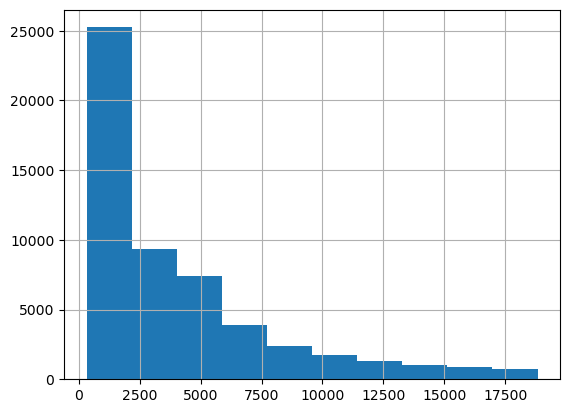

In [4]:
%matplotlib inline
#creating bar chart as the target variable is continuos 
DiamondPricesData['price'].hist()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from. The distribution is positively skewed but that is acceptable.

## 5. Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. We must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, <b>does this column affect the price of the diamond?</b> If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [5]:
#looking at the sample row of data
DiamondPricesData.head(10)

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
5,336,0.24,Very Good,J,VVS2,NaN,57.0,3.94,3.96,2.48
6,336,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47
7,337,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
8,337,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49
9,338,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39


In [6]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
DiamondPricesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53794 non-null  int64  
 1   carat    53794 non-null  float64
 2   cut      53794 non-null  object 
 3   color    53788 non-null  object 
 4   clarity  53794 non-null  object 
 5   depth    53780 non-null  float64
 6   table    53794 non-null  float64
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [7]:
# Looking at the descriptive statistics of the data
DiamondPricesData.describe(include='all')

,price,carat,cut,color,clarity,depth,table,x,y,z
count,53794.000000,53794.00000,53794,53788,53794,53780.000000,53794.000000,53794.000000,53794.000000,53794.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21488,11256,13032,NaN,NaN,NaN,NaN,NaN
mean,3933.065082,0.79778,NaN,NaN,NaN,61.748154,57.458109,5.731214,5.734653,3.538714
std,3988.114460,0.47339,NaN,NaN,NaN,1.429948,2.233679,1.120695,1.141209,0.705037
min,326.000000,0.20000,NaN,NaN,NaN,43.000000,43.000000,0.000000,0.000000,0.000000
25%,951.000000,0.40000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.70000,NaN,NaN,NaN,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5326.750000,1.04000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.540000,4.030000


In [8]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
DiamondPricesData.nunique()

price      11602
carat        273
cut            5
color          7
clarity        8
depth        184
table        127
x            554
y            552
z            375
dtype: int64

### Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your 
observations regaring each column. Hence, creating a initial roadmap for further analysis. 

The selected columns in this step are not final, further study will be done and then a final list will be created

* <b>Price</b>: Continuous. Selected. This is the <b>Target Variable!</b>
* <b>carat</b>: Continuous. Selected.
* <b>cut</b>: Categorical. Selected.
* <b>color</b>: Categorical. Selected.
* <b>clarity</b>: Categorical. Selected.
* <b>depth</b>: Continuous. Selected.
* <b>table</b>: Continuous. Selected.
* <b>x</b>: Continuous. Selected.
* <b>y</b>: Continuous. Selected.
* <b>z</b>: Continuous. Selected.

## 6. Removing useless columns from the data

#### No qualitative variable to be removed

## 7. Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

#### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted three categorical predictors in the data

<b>Categorical Predictors: </b>
'cut', 'color', 'clarity'
    
We use bar charts to see how the data is distributed for these categorical columns.

In [9]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    #generatinng multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))
    
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

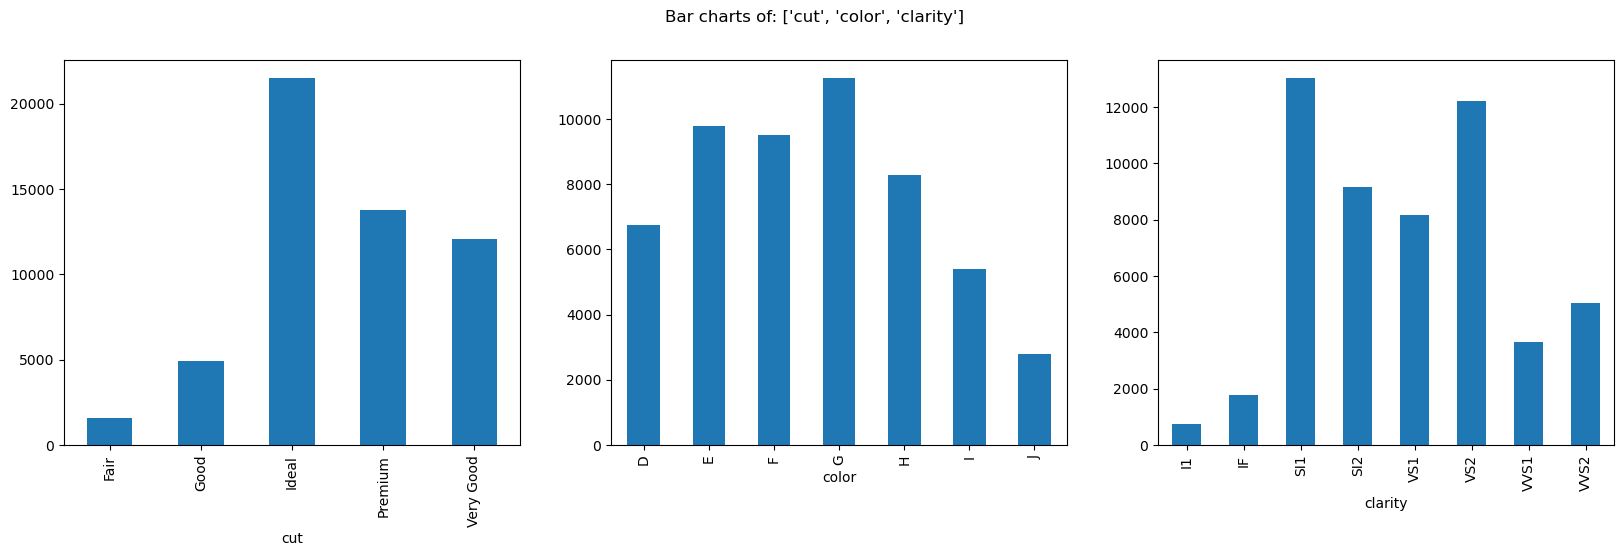

In [10]:
#calling the function
PlotBarCharts(inpData=DiamondPricesData, colsToPlot= ['cut', 'color', 'clarity'])



### Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

Selected Categorical Variables: All the categorical variables are selected for further analysis.

'cut', 'color', 'clarity'

#### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, Six continuous predictor variables 'carat','depth','table','x','y' and 'z'.

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>],
       [<AxesSubplot:title={'center':'table'}>,
        <AxesSubplot:title={'center':'x'}>],
       [<AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>]], dtype=object)

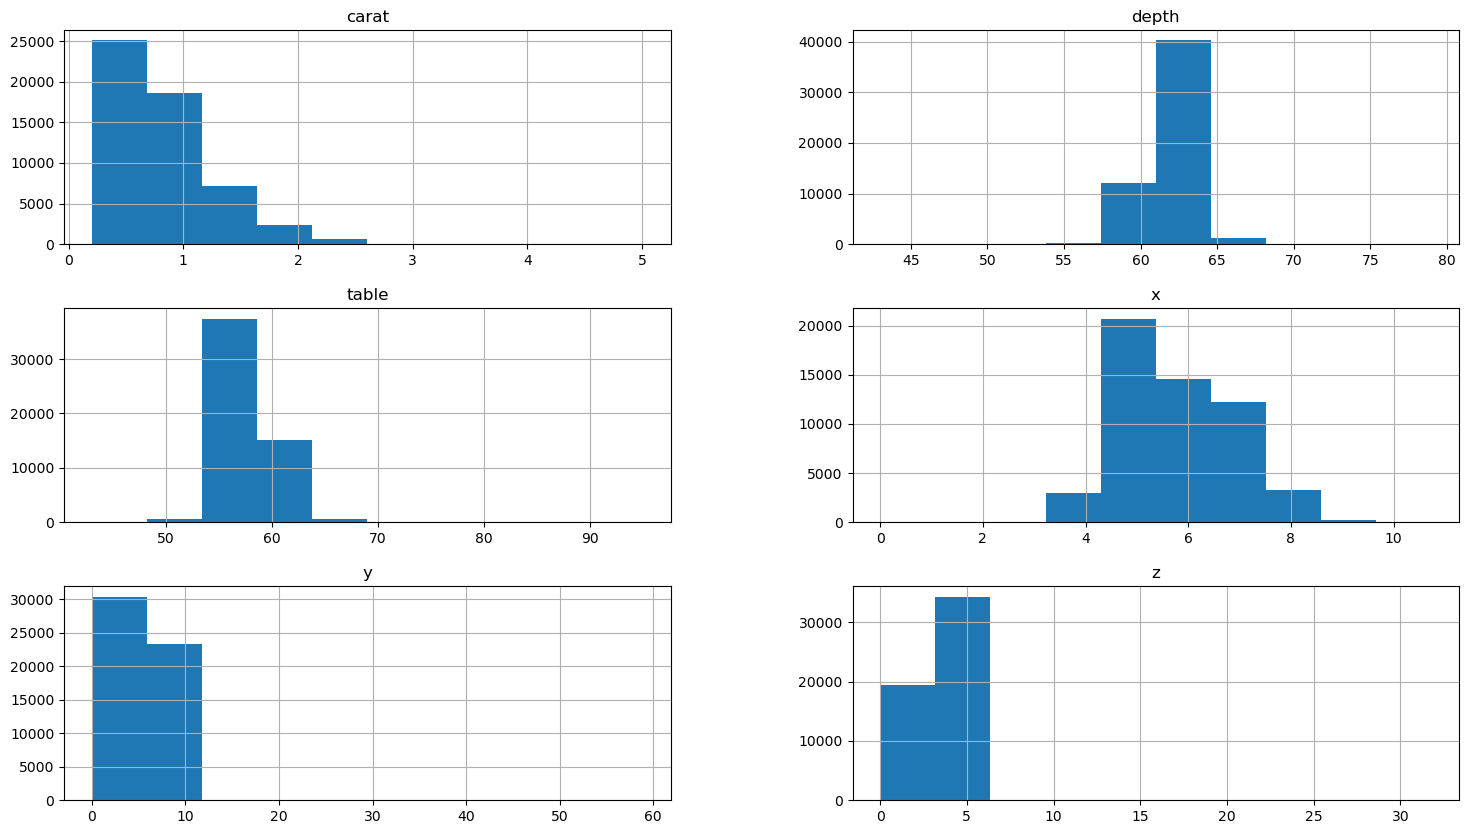

In [11]:
# Plotting histograms of multiple columns together
DiamondPricesData.hist(['carat','depth','table','x','y','z'],figsize=(18,10))

### Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "carat", there are around 25000 rows in data that has a value between 0 to 0.5.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

Selected Continuous Variables:

* carat : Selected. The distribution is good.
* depth : Selected. The distribution is good.
* table : Selected. The distribution is good.
* x: Selected. Outliers near 0. Need to treat them.
* y: Selected. Outliers beyond 20. Need to treat them.
* z: Selected. Outliers beyond 10. Need to treat them.

## 8. Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.
* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

In [12]:
#DiamondPricesData['table'][DiamondPricesData['table']>70].sort_values(ascending=False)

#### Treating outliers for 'x' column

In [13]:
#finding nearest value to 2 mark
DiamondPricesData['x'][DiamondPricesData['x']>2].sort_values(ascending=True)

31596     3.73
31600     3.73
31598     3.74
31599     3.76
31601     3.77
         ...  
26444    10.01
25999    10.02
25998    10.14
27630    10.23
27415    10.74
Name: x, Length: 53787, dtype: float64

In [14]:
# Based on the above output, the nearest logical value is 3.73, hence, replacing any value less than 3.73 with it.
# Replacing outliers with nearest logical value
DiamondPricesData['x'][DiamondPricesData['x']<3.73]=3.73

#### Treating outliers for 'y' column

In [15]:
#finding nearest value to 20 mark
DiamondPricesData['y'][DiamondPricesData['y']<20].sort_values(ascending=False)

27415    10.54
27630    10.16
25998    10.10
26444     9.94
25999     9.94
         ...  
26243     0.00
11963     0.00
24520     0.00
15951     0.00
49556     0.00
Name: y, Length: 53792, dtype: float64

In [16]:
#finding nearest value to 0 mark
DiamondPricesData['y'][DiamondPricesData['y']>0].sort_values(ascending=True)

31600     3.68
31596     3.71
31598     3.71
31601     3.72
31599     3.73
         ...  
25998    10.10
27630    10.16
27415    10.54
49189    31.80
24067    58.90
Name: y, Length: 53788, dtype: float64

In [17]:
# Based on the above output, the nearest logical value for right side is 10.54, hence, replacing any value greater than 10.54 with it.
# Above result shows the nearest logical value for left side is 3.68, hence, replacing any value below 2 with it.
# Replacing outliers with nearest logical value
DiamondPricesData['y'][DiamondPricesData['y']>20]=10.54
DiamondPricesData['y'][DiamondPricesData['y']<2]=3.68

#### Treating outliers for 'z' column

In [18]:
#finding nearest value to 20 mark
DiamondPricesData['z'][DiamondPricesData['z']<10].sort_values(ascending=False)

24067    8.06
27415    6.98
27630    6.72
27130    6.43
23644    6.38
         ... 
49556    0.00
4791     0.00
26123    0.00
5471     0.00
13601    0.00
Name: z, Length: 53793, dtype: float64

In [19]:
#finding nearest value to 0 mark
DiamondPricesData['z'][DiamondPricesData['z']>0].sort_values(ascending=True)

14635     1.07
21654     1.41
20694     1.53
39246     2.06
31592     2.24
         ...  
27130     6.43
27630     6.72
27415     6.98
24067     8.06
48410    31.80
Name: z, Length: 53775, dtype: float64

In [20]:
# Based on the above output, the nearest logical value for right side is 6.98, hence, replacing any value greater than 6.98 with it.
# Above result shows the nearest logical value for left side is 2.06, hence, replacing any value below 2 with it.
# Replacing outliers with nearest logical value
# DiamondPricesData['z'][DiamondPricesData['z']>8]=6.98
DiamondPricesData['z'][DiamondPricesData['z']<2]=2.06

#### Visualizing the distribution again after outlier treatment

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

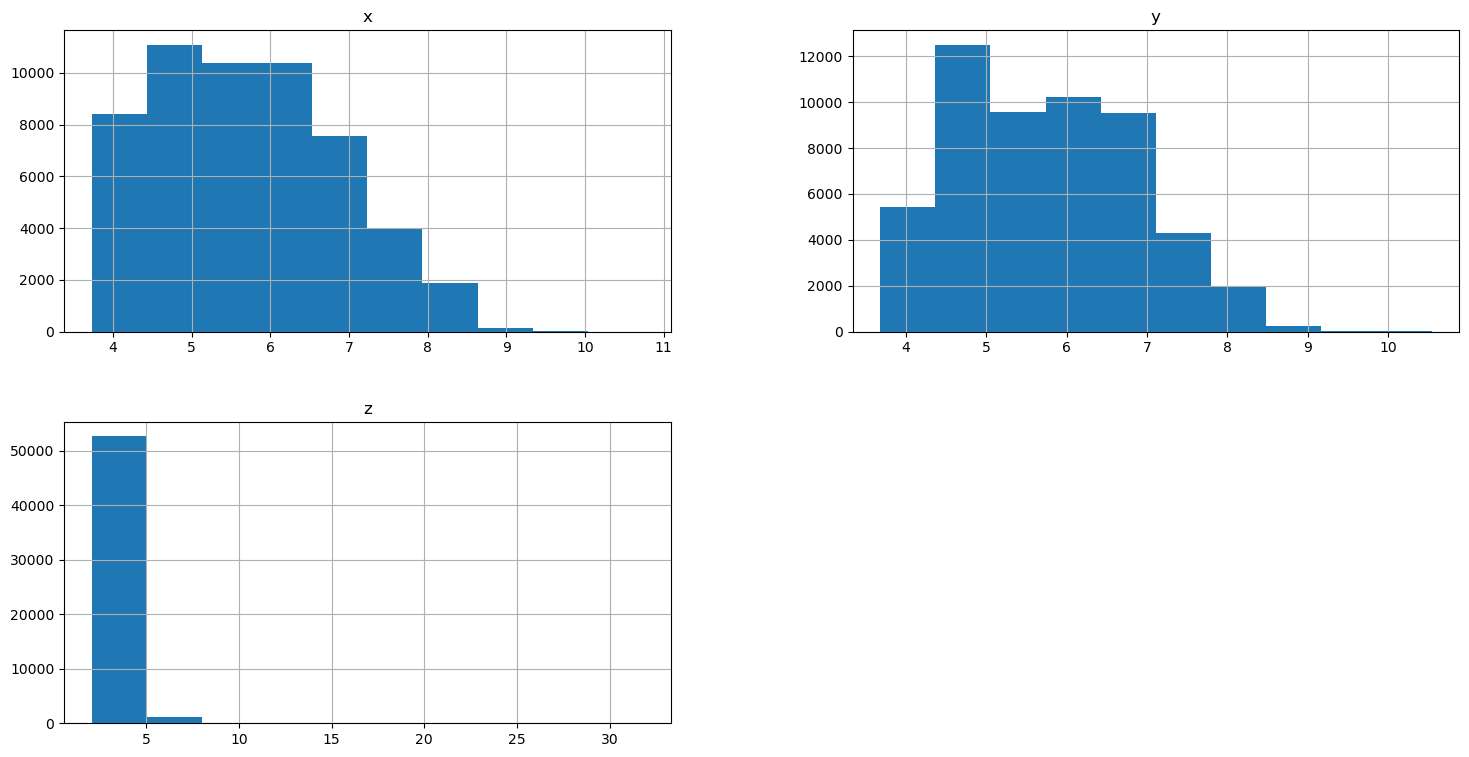

In [21]:
# Histogram for x, y, z after outlier treatment
DiamondPricesData.hist(['x','y','z'],figsize=(18,9))

## 9. Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Interpolate the values based on business logic
* Interpolate the values based on nearby values
* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables

In [22]:
# Finding how many missing values are there for each column
DiamondPricesData.isnull().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

I am treating missing values with Median for Continuous values, and Mode for categorical values.

In [23]:
DiamondPricesData['color'].mode()[0]

'G'

In [24]:
DiamondPricesData['depth'].median()

61.8

In [25]:
# Treating missing values of categorical variable with MODE value
DiamondPricesData['color'].fillna(value=DiamondPricesData['color'].mode()[0],inplace=True)


In [26]:
# Treating missing values of continuous variable with MEDIAN value
DiamondPricesData['depth'].fillna(value=DiamondPricesData['depth'].median(),inplace=True)


In [27]:
# Checking missing values again after the treatment
DiamondPricesData.isnull().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

## 10. Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

#### Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

#### Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is Continuous, hence below two scenarios will be present

* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

#### Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

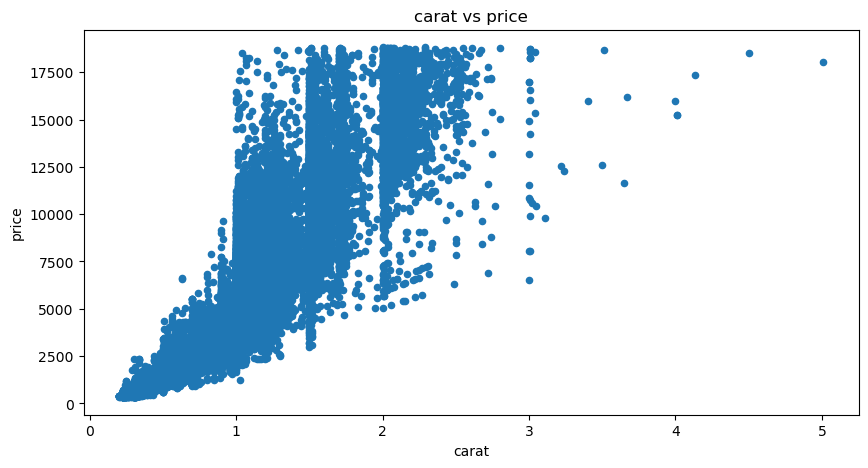

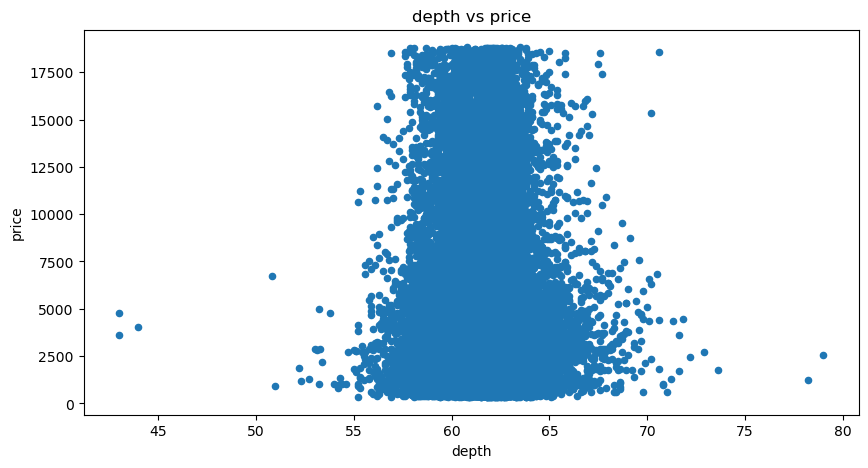

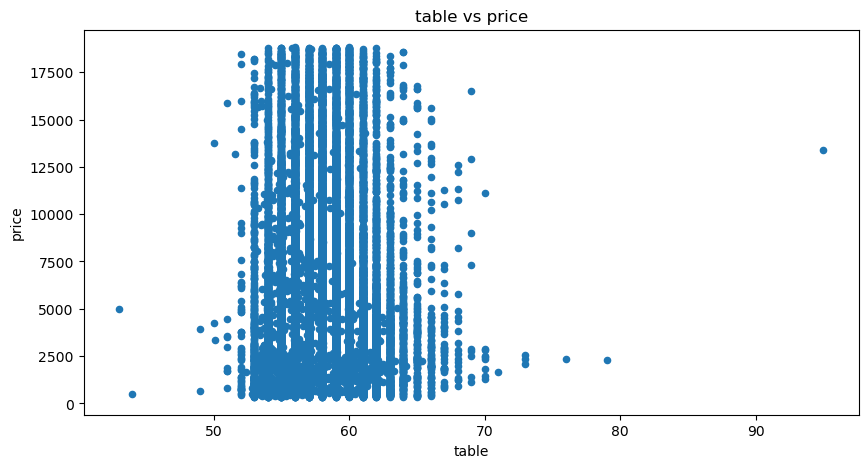

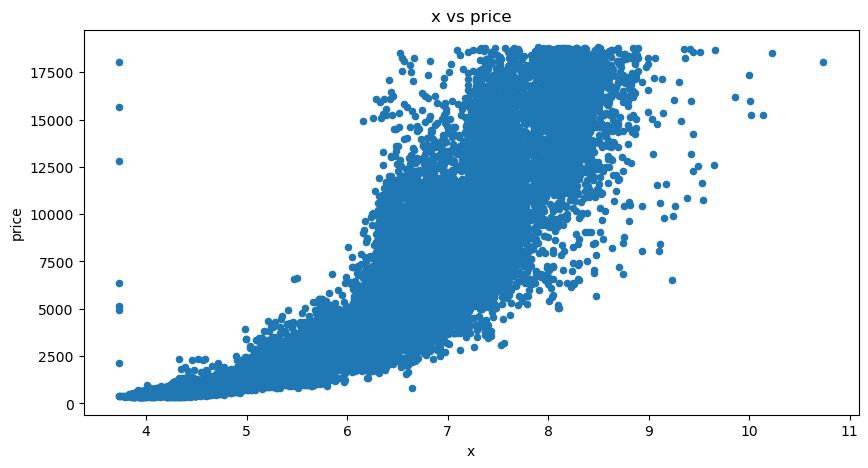

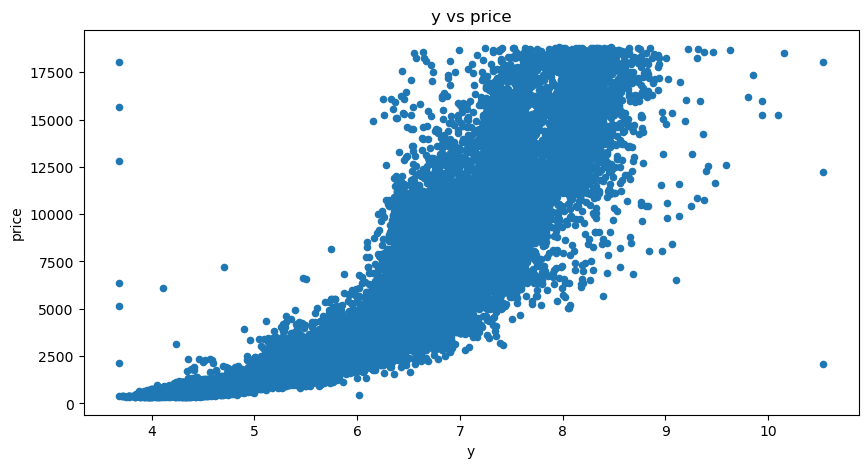

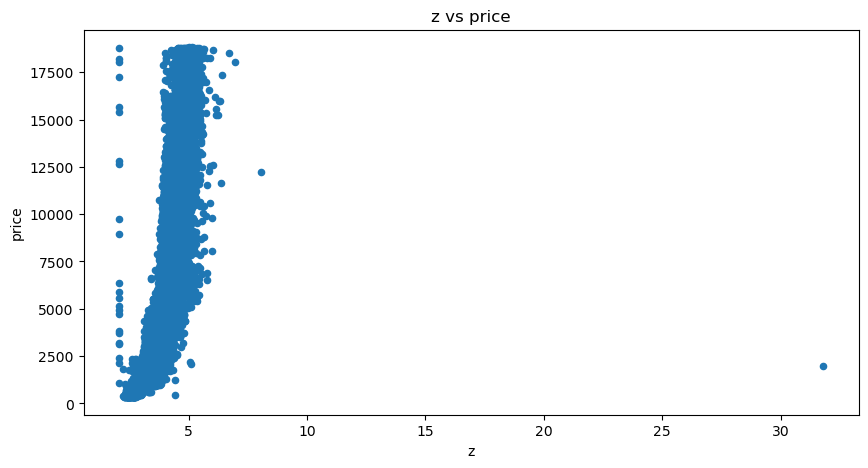

In [28]:
ContinuousCols=['carat','depth','table','x','y','z']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    DiamondPricesData.plot.scatter(x=predictor,y='price',figsize=(10,5), title=predictor + " vs"+' price')

#### Scatter charts interpretation
<b>What should you look for in these scatter charts? </b>

Trend.
You should try to see if there is a visible trend or not. There could be three scenarios
1. Increasing Trend:
This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

2. Decreasing Trend:
This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

3. No Trend:
You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart we can get a good idea about the predictor, if it will be useful or not.
We confirm this by looking at the correlation value.

#### Outlier found in scatter plot
for 'x', 'y', 'z' charts, there is a line in left side for outliers. We need to treat those otherwise it will impact the model.

In [29]:
# Creating a data filter to remove outliers from data
DataFilter=(DiamondPricesData['z']>2.06) & (DiamondPricesData['z']<6.5)
DiamondPricesData=DiamondPricesData[DataFilter]

#### Looking at charts after the outlier removal


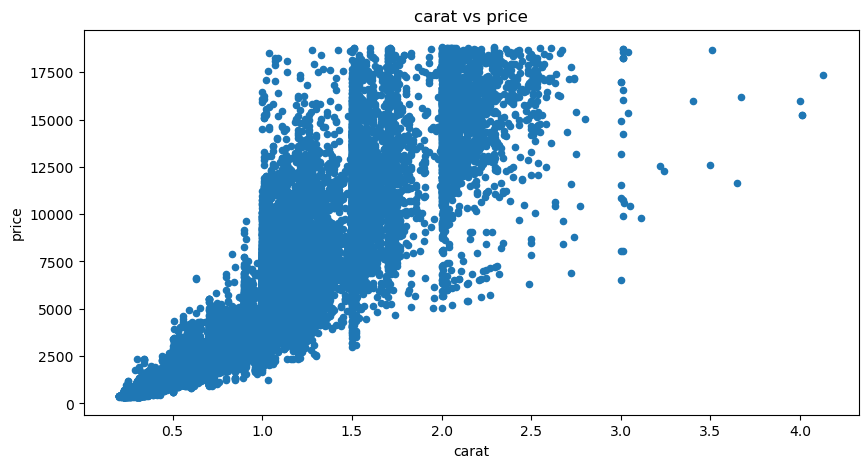

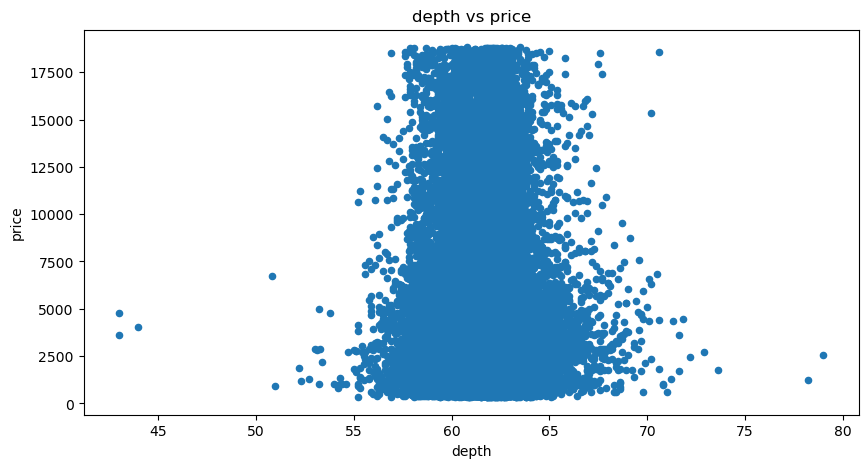

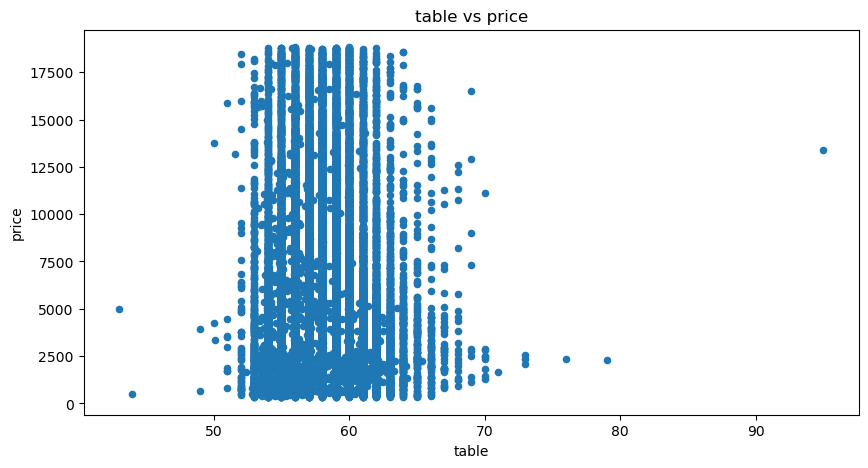

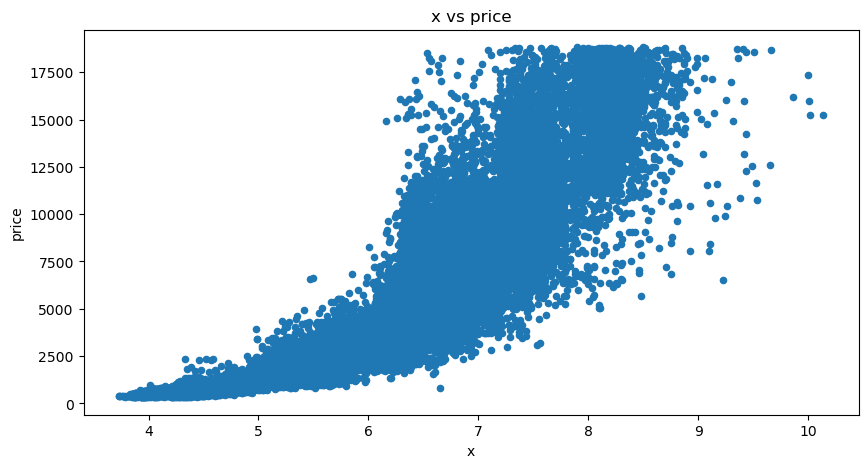

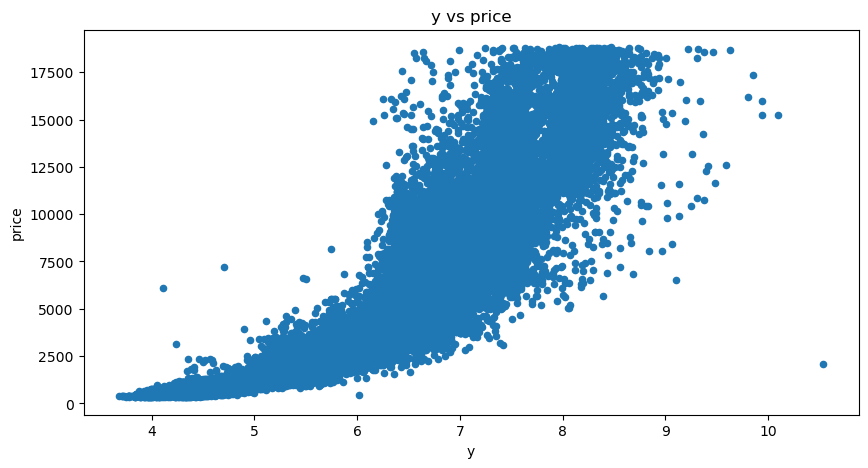

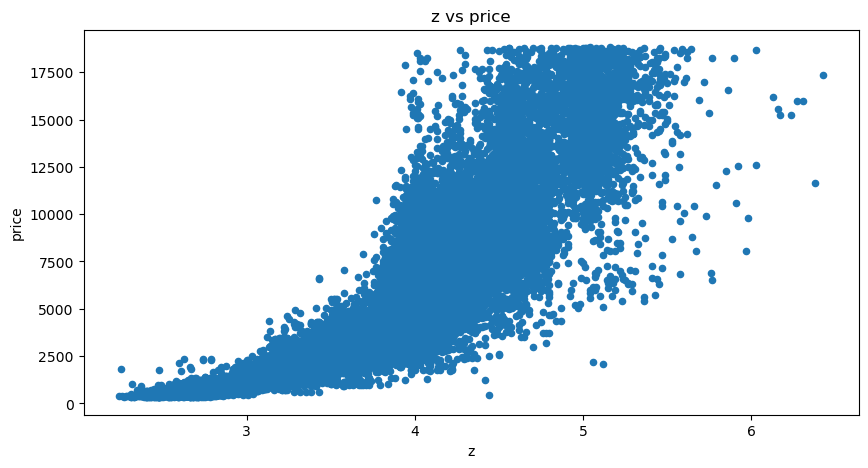

In [30]:
ContinuousCols=['carat','depth','table','x','y','z']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    DiamondPricesData.plot.scatter(x=predictor,y='price',figsize=(10,5), title=predictor + " vs"+' price')

#### Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

Pearson's correlation coefficient can simply be calculated as
the covariance between two features $x$ and $y$ (numerator) divided by the product
of their standard deviations (denominator):  

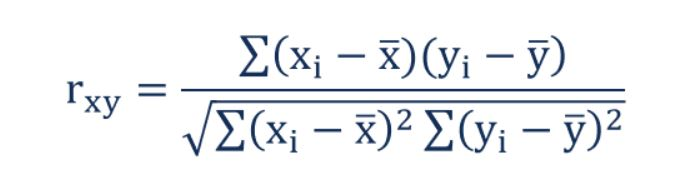

* This value can be calculated only between two numeric columns
* Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship <b>the sign does not matter</b>
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

In [31]:
# Calculating correlation matrix
ContinuousCols=['price','carat','depth','table','x','y','z']

# Creating the correlation matrix
CorrelationData=DiamondPricesData[ContinuousCols].corr()
CorrelationData

,price,carat,depth,table,x,y,z
price,1.000000,0.921845,-0.011424,0.126696,0.887063,0.888460,0.882354
carat,0.921845,1.000000,0.027212,0.181277,0.978136,0.977011,0.977179
depth,-0.011424,0.027212,1.000000,-0.297608,-0.025531,-0.028635,0.095916
table,0.126696,0.181277,-0.297608,1.000000,0.195519,0.189201,0.154926
x,0.887063,0.978136,-0.025531,0.195519,1.000000,0.998435,0.991574
y,0.888460,0.977011,-0.028635,0.189201,0.998435,1.000000,0.991271
z,0.882354,0.977179,0.095916,0.154926,0.991574,0.991271,1.000000


In [32]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['price'][abs(CorrelationData['price'])>0.5]

price    1.000000
carat    0.921845
x        0.887063
y        0.888460
z        0.882354
Name: price, dtype: float64

<b>Final selected Continuous columns:</b>

'carat', 'x', 'y', 'z'

#### Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

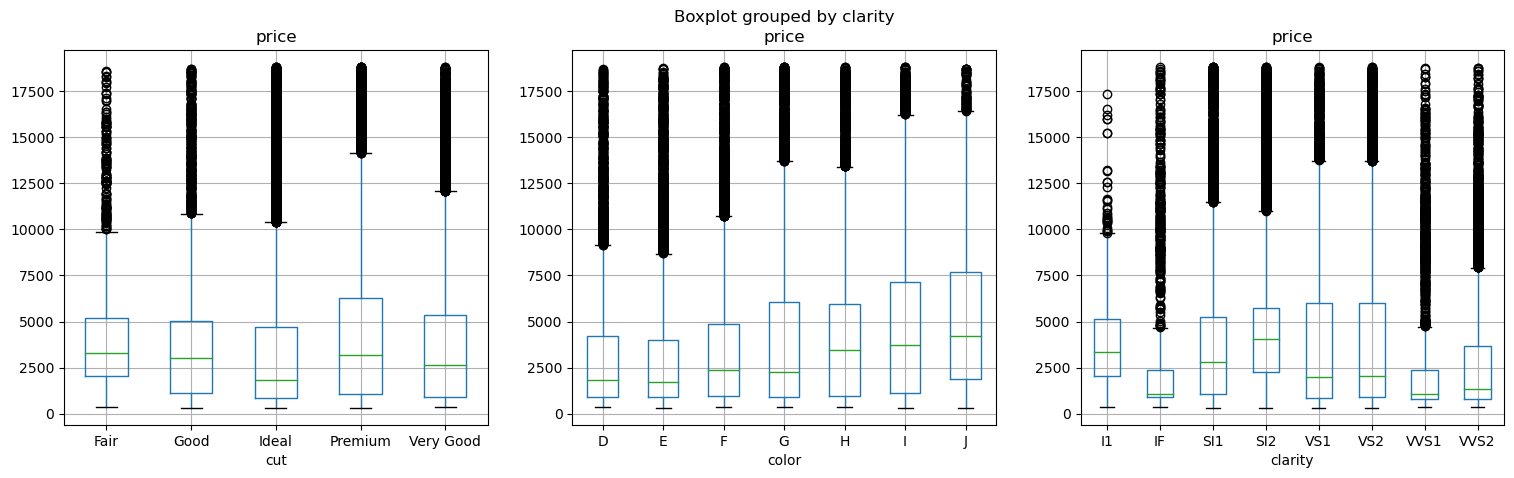

In [33]:
# Box plots for continuous Target Variable "price" and categorical predictors
CategoricalColsList=['cut', 'color', 'clarity']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each categorical predictor against the Target Variable "price"
for PredictorCol, i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    DiamondPricesData.boxplot(column='price', by=PredictorCol, figsize=(10,10), vert=True, ax=PlotCanvas[i])

#### Box-Plots interpretation
<b>What should you look for in these box plots? </b>

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Price.

In this data, all the categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

#### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [34]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('***ANOVA RESULTS***\n')
    for predictor in CategoricalPredictorList:
        CategoryGroupList=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults=f_oneway(*CategoryGroupList)
        
            # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1]<0.05):
            print(predictor, ' is correlated with', TargetVariable, ' | P-Value:',AnovaResults[1])
            SelectedPredictors.append(predictor)
        else: 
            print(predictor, ' is not correlated with', TargetVariable, ' | P-Value:',AnovaResults[1])

    return(SelectedPredictors)

In [35]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['cut', 'color', 'clarity']
FunctionAnova(DiamondPricesData,'price',CategoricalPredictorList)

***ANOVA RESULTS***

cut  is correlated with price  | P-Value: 2.41639003272117e-146
color  is correlated with price  | P-Value: 0.0
clarity  is correlated with price  | P-Value: 1.655076560414e-312


['cut', 'color', 'clarity']

he results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable . This is something we guessed by looking at the box plots!

<b>Final selected Categorical columns:</b>

'cut', 'color', 'clarity'

### Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [36]:
SelectedColumns=['cut', 'color', 'clarity','carat', 'x', 'y', 'z']

# Selecting final columns
DataForML=DiamondPricesData[SelectedColumns]
DataForML.head()

,cut,color,clarity,carat,x,y,z
0,Ideal,E,SI2,0.23,3.95,3.98,2.43
1,Premium,E,SI1,0.21,3.89,3.84,2.31
2,Good,E,VS1,0.23,4.05,4.07,2.31
3,Premium,I,VS2,0.29,4.20,4.23,2.63
4,Good,J,SI2,0.31,4.34,4.35,2.75


In [37]:
# Saving this final data in serialized format for reference during deployment
DataForML.to_pickle('DataForML.pkl')
import os
os.getcwd()

'C:\\Users\\payel\\PythonML_IVY'

In [38]:
import pandas as pd
DataForML=pd.read_pickle('DataForML.pkl')

## 11. Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

#### 1. Converting the ordinal variable to numeric using mapping 
ordinal variables: 'cut', 'color', 'clarity'

In [39]:
# Looking at unique values of ordinal column cut
DataForML['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [40]:
# Replacing the ordinal values for cut
DataForML['cut'].replace({'Good':1,
                         'Very Good':2,
                         'Fair':3,
                         'Premium':4,
                         'Ideal':5},inplace=True)

In [41]:
# Looking at unique values of ordinal column color
DataForML['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [42]:
# Replacing the ordinal values for color
#D color diamond is the highest grade and is extremely rare—the highest color grade that money can buy. 
#Eight percent of customers choose a D color diamond.
DataForML['color'].replace({'J':1,
                         'I':2,
                         'H':3,
                         'G':4,
                         'F':5,
                         'E':6,
                         'D':7 },inplace=True)

In [43]:
# Looking at unique values of ordinal column cut
DataForML['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [44]:
# Replacing the ordinal values for clarity
DataForML['clarity'].replace({'I1':1,
                          'SI1':2,
                          'SI2':3,
                          'VS1':4,
                          'VS2':5,
                          'VVS1':6,
                          'VVS2':7,
                          'IF':8 }, inplace=True)

#### 2. Converting the binary nominal variable to numeric using 1/0 mapping
There is no binary nominal variable in string format to be converted

#### 3. Converting the nominal variable to numeric using get_dummies()

In [45]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['price']=DiamondPricesData['price']

# Printing sample rows
DataForML_Numeric.head()

,cut,color,clarity,carat,x,y,z,price
0,5,6,3,0.23,3.95,3.98,2.43,326
1,4,6,2,0.21,3.89,3.84,2.31,326
2,1,6,4,0.23,4.05,4.07,2.31,327
3,4,2,5,0.29,4.20,4.23,2.63,334
4,1,1,3,0.31,4.34,4.35,2.75,335


## 12. Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [46]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['cut', 'color', 'clarity', 'carat', 'x', 'y', 'z', 'price'], dtype='object')

In [47]:
# Separate Target Variable and Predictor Variables
TargetVariable='price'
Predictors=['cut', 'color', 'clarity', 'carat', 'x', 'y', 'z']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=369)

In [48]:
X_train[0:6]

array([[1.  , 4.  , 5.  , 0.4 , 4.67, 4.7 , 2.94],
       [4.  , 6.  , 5.  , 0.35, 4.49, 4.46, 2.78],
       [2.  , 7.  , 4.  , 0.27, 4.15, 4.2 , 2.52],
       [5.  , 7.  , 8.  , 1.06, 6.57, 6.61, 4.03],
       [4.  , 1.  , 4.  , 1.53, 7.47, 7.51, 4.5 ],
       [2.  , 6.  , 7.  , 0.4 , 4.74, 4.81, 2.93]])

## 13. Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [49]:
### Standardization of data ###
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScaler.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [50]:
# Sanity check for the sampled data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37636, 7)
(16131, 7)
(37636,)
(16131,)


## 14.1. Multiple Linear Regression

In [51]:
import time
T1=time.time()
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel=LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 value:', metrics.r2_score(y_train, LREG.predict(X_train)))

######################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test,columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']= 100*((
    abs(TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy=100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean accuracy on test data: ',Accuracy)
print('Median accuracy on test data: ',MedianAccuracy)

# Defining a custom function to calculate accuracy for cross validation
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE= np.mean(100*(np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring= make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy Values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:\n', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

LinearRegression()
R2 value: 0.8994698457083687

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   4039          4334.0
1   3239          3546.0
2   6089          5951.0
3   9660          7202.0
4   2326          2581.0
Mean accuracy on test data:  59.70509215902288
Median accuracy on test data:  77.46015246015246

Accuracy Values for 10-fold Cross Validation:
 [61.63233089 69.85224384 78.81396941 75.86245126 75.56402652 16.45341201
 28.77649355 40.88457318 55.98577652 65.17270756]

Final Average Accuracy of the model:
 56.9
Time taken: 0.12214136123657227


## 14.2. Decision Trees

DecisionTreeRegressor(max_depth=12)
R2 value:  0.9875599630995611

###### Model Validation and Accuracy Calculations ######
   price  Predictedprice
0   4039          3239.0
1   3239          3269.0
2   6089          6420.0
3   9660         10022.0
4   2326          2526.0
Mean Accuracy on test data: 91.6112747493788
Median Accuracy on test data: 93.88429752066116

Accuracy values for 10-fold Cross Validation:
 [82.21831272 85.48635185 84.45056664 81.42274839 77.49071681 82.14216687
 83.97427781 80.64679531 80.73605019 82.69184643]

Final Average Accuracy of the model: 82.13
Time taken: 1.0994598865509033


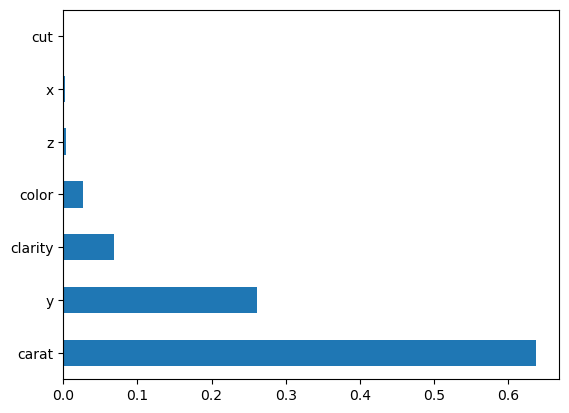

In [52]:
import time
T1=time.time()
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel=DecisionTreeRegressor(max_depth=12,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

# Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 value: ',metrics.r2_score(y_train,DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

######################################################################
print('\n###### Model Validation and Accuracy Calculations ######')


# Printing some sample values of prediction
# creating dataframe for test data
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]= y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100* ((abs(
    TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy= 100 -MAPE
MedianAccuracy=100-MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy for cross validation
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE= np.mean(100* (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score,greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel,X, y, cv=10,scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)


#### Plotting a Decision Tree

In [53]:
# Installing the required library for plotting the decision tree
# Make sure to run all three commands
# 1. Open anaconda Prompt
# pip install graphviz
# conda install graphviz
# pip install pydotplus

In [54]:
# Adding graphviz path to the PATH env variable
# Try to find "dot.exe" in your system and provide the path of that folder
import os
os.environ["PATH"] += os.pathsep + 'C:\\ProgramData\\Anaconda3\\Library\\bin\\graphviz'

#max depth 12 is too large to plot

## 14.3. Random Forest

RandomForestRegressor(max_depth=6)
R2 Value:  0.9611060868196162

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   4039          3302.0
1   3239          3124.0
2   6089          6909.0
3   9660         10252.0
4   2326          2321.0
Mean Accuracy on test data: 86.80543425291089
Median Accuracy on test data: 89.81132075471697

Accuracy values for 10-fold Cross Validation:
 [77.71242696 82.81627995 81.38172066 78.71401515 77.78402968 80.07403347
 79.70148476 73.90320568 80.1426544  80.92143235]

Final Average Accuracy of the model: 79.32
Time taken: 37.47990942001343


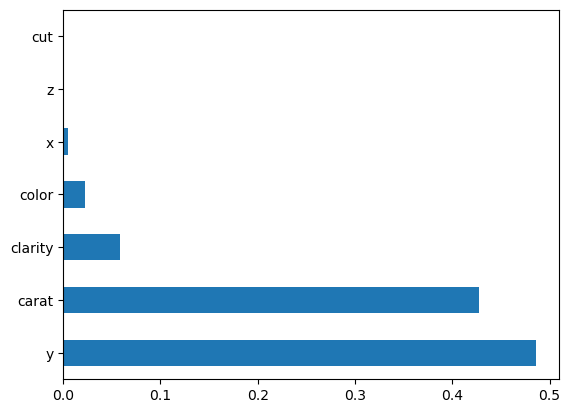

In [55]:
import time
T1=time.time()
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel=RandomForestRegressor(max_depth=6, n_estimators=100, criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value: ',metrics.r2_score(y_train,RF.predict(X_train)))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+TargetVariable]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

#### Plotting one of the Decision Trees in Random Forest
max_depth=6 is too high to plot

## 14.4. AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.01, n_estimators=100)
R2 Values:  0.9852969948330659

###### Model Validation and Accuracy Calculations ######

   price  Predictedprice
0   4039          3262.0
1   3239          3064.0
2   6089          6362.0
3   9660         10055.0
4   2326          2415.0
Mean Accuracy on test data: 91.36648551325604
Median Accuracy on test data: 93.40141398271798

Accuracy values for 10-fold Cross Validation:
 [81.81807765 85.77175832 84.78605183 81.95317522 78.33744844 81.29324572
 84.44320442 81.47178615 81.26700728 82.19514476]

Final Average Accuracy of the model: 82.33
Time taken: 102.53306245803833


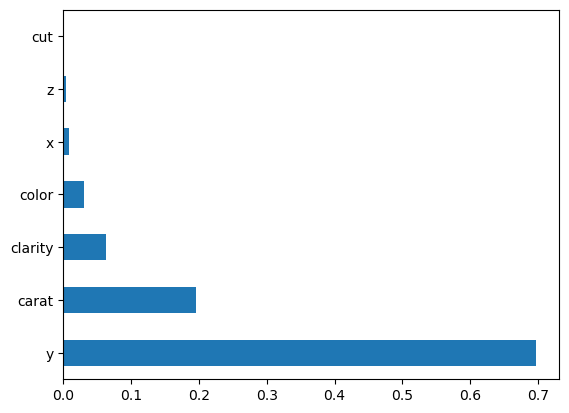

In [56]:
import time
T1=time.time()
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=10)
RegModel=AdaBoostRegressor(n_estimators=100, base_estimator=DTR, learning_rate=0.01)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AD=RegModel.fit(X_train,y_train)
prediction=AD.predict(X_test)

# Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Values: ', metrics.r2_score(y_train,AD.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AD.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n###### Model Validation and Accuracy Calculations ######\n')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+TargetVariable]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

#### Plotting one of the Decision trees from Adaboost
 max_depth=10 is too large to plot here

## 14.5. XGBoost

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', predictor=None,
             random_state=None, reg_alpha=None, ...)
[21:36:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
R2 Values:  0.9780020352451424

###### Model Validation and Accuracy Calculations ###

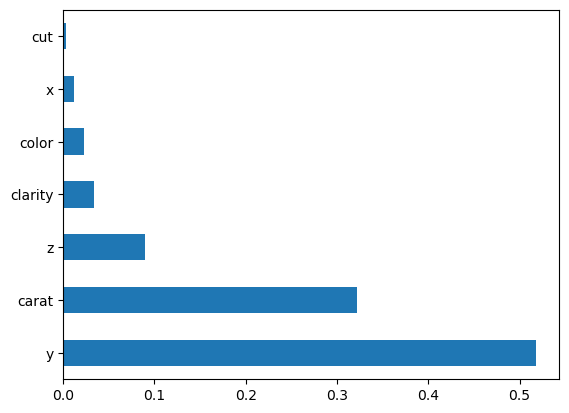

In [57]:
import time
T1=time.time()
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                     learning_rate=0.1,
                     n_estimators=1000,
                     objective='reg:linear',
                     booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Values: ', metrics.r2_score(y_train,XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n###### Model Validation and Accuracy Calculations ######\n')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+TargetVariable]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))   
T2=time.time()
print("Time taken:", T2-T1)

#### Plotting a single Decision tree out of XGBoost

<AxesSubplot:>

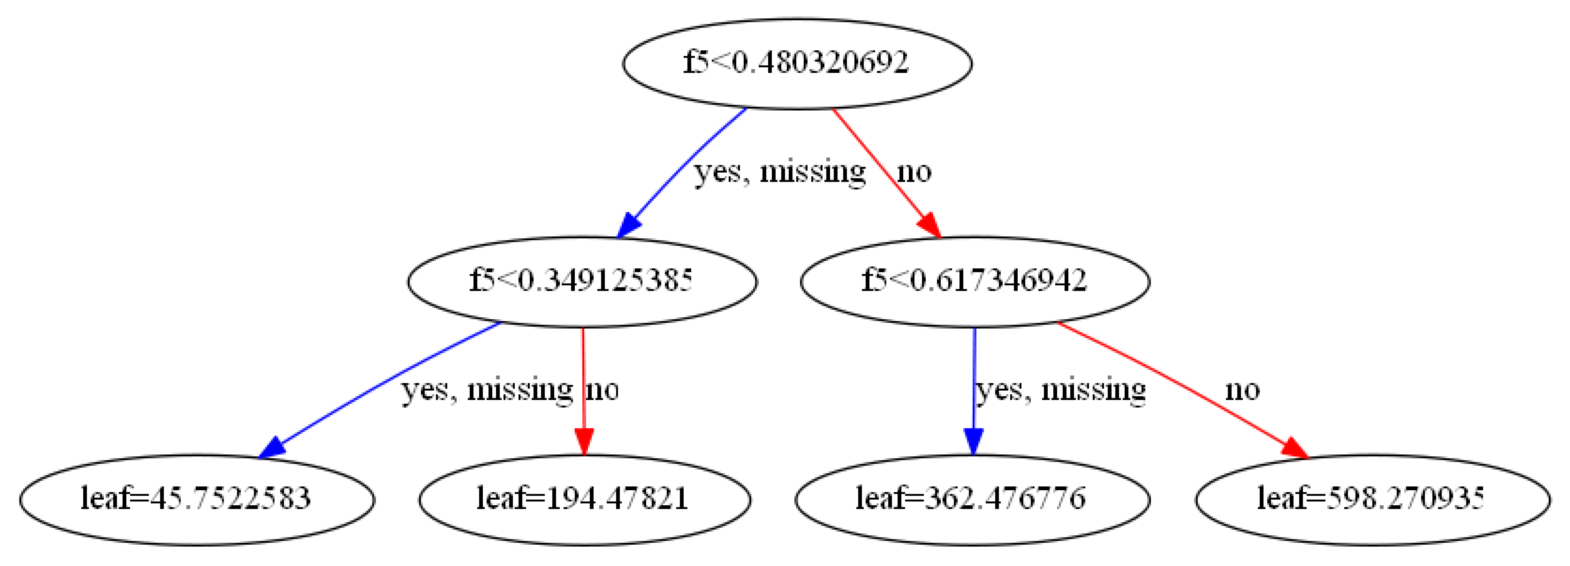

In [58]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(20,8))
plot_tree(XGB, num_trees=10, ax=ax)

## 14.6. KNN

In [59]:
import time
T1=time.time()
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel=KNeighborsRegressor(n_neighbors=4)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Values: ',metrics.r2_score(y_train,KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n###### Model Validation and Accuracy Calculations ######\n')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+TargetVariable]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))  
T2=time.time()
print("Time taken:", T2-T1)

KNeighborsRegressor(n_neighbors=4)
R2 Values:  0.985168083279333

###### Model Validation and Accuracy Calculations ######

   price  Predictedprice
0   4039          3422.0
1   3239          3310.0
2   6089          5906.0
3   9660          9823.0
4   2326          2538.0
Mean Accuracy on test data: 91.9753316257418
Median Accuracy on test data: 94.4423997055576

Accuracy values for 10-fold Cross Validation:
 [84.09304305 86.94340353 86.20748065 83.9116342  81.28875473 82.43865493
 83.88539314 83.10873826 83.66638687 84.49341509]

Final Average Accuracy of the model: 84.0
Time taken: 3.7678308486938477


## 15. Deployment of the Model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing KNN as the final model since it is very fast for this data!

In order to deploy the model we follow below steps

* Train the model using 100% data available
* Save the model as a serialized file which can be stored anywhere
* Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

#### Choosing only the most important variables
Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.

This is important specially when the data is high dimensional(too many predictor columns).

In this data, the most important predictor variables are 'carat','y', 'color' and 'clarity'

As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [60]:
# Separate Target Variable and Predictor Variables
TargetVariable='price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['carat', 'y', 'color', 'clarity']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Standardization of data ###
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(53767, 4)
(53767,)


#### Step 1. Retraining the model using 100% data

In [61]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel=KNeighborsRegressor(n_neighbors=4)

# Training the model on 100% Data available
Final_KNN_Model=RegModel.fit(X,y)


#### Cross validating the final model accuracy with less predictors

In [62]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(Final_KNN_Model,X,y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [83.93745166 86.68504646 86.13021249 83.69627634 81.28995539 79.79591784
 82.66804902 82.99292523 83.88674132 84.14375815]

Final Average Accuracy of the model: 83.52


#### Step 2. Save the model as a serialized file which can be stored anywhere

In [63]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_KNN_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_KNN_Model, fileWriteStream)
    fileWriteStream.close()
    
#print('pickle file of Predictive Model is saved at Location:', os.getcwd())

#### Step 3. Create a python function

In [64]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
# Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Treating ordinal variables
    # Replacing the ordinal values of color
    InputData['color'].replace({  'J':1, 
                                  'I':2,
                                  'H':3,
                                  'G':4,
                                  'F':5,
                                  'E':6,
                                  'D':7
                                 }, inplace=True)
    
     # Replacing the ordinal values for clarity
    InputData['clarity'].replace({'I1':1,
                                  'SI1':2,
                                  'SI2':3,
                                  'VS1':4,
                                  'VS2':5,
                                  'VVS1':6,
                                  'VVS2':7,
                                  'IF':8
                                 }, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
    
     # Maintaining the same order of columns as it was during the model training
    Predictors=['carat','y', 'color' , 'clarity']
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
     # Loading the Function from pickle file
    import pickle
    with open('Final_KNN_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        fileReadStream.close()
        
    # Genprice Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

In [65]:
# Calling the function for new sample data
NewSampleData=pd.DataFrame(
data=[[0.23,3.98,'E','SI2'],
     [0.29, 4.23,'I','VS2']],
columns=['carat','y', 'color' , 'clarity'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)


   carat     y color clarity
0   0.23  3.98     E     SI2
1   0.29  4.23     I     VS2


,Prediction
0,401.25
1,412.50


The Function FunctionPredictResult() can be used to produce the predictions for one or more cases at a time. Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the loan applications available in the system.

## Deploying a predictive model as an API
* Django and flask are two popular ways to deploy predictive models as a web service
* You can call your predictive models using a URL from any front end like tableau, java or angular js

#### Creating the model with few parameters
#### Function for predictions API

In [66]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_carat, inp_y, inp_color, inp_clarity):
    
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(data=[[inp_carat, inp_y, inp_color, inp_clarity]],
                                columns=['carat','y', 'color' , 'clarity'])
    
    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData=SampleInputData)
    
     # Returning the predicted value
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction(  inp_carat=0.29,
                             inp_y =4.23,
                             inp_color='I',
                             inp_clarity='VS2'
                             )

    

'{"Prediction":{"0":412.5}}'

In [67]:
# Installing the flask library required to create the API
#!pip install flask

#### Creating Flask API

In [68]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy 


In [69]:
app=Flask(__name__)

@app.route('/prediction_api', methods=['GET'])

#try-catch for exception handling
def prediction_api():
    try:
        # Getting the paramters from API call
        carat_value=float(request.args.get('carat'))
        y_value=float(request.args.get('y'))
        color_value=request.args.get('color')
        clarity_value=request.args.get('clarity')
        
        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                        inp_carat=carat_value,
                                                        inp_y=y_value,
                                                        inp_color=color_value,
                                                        inp_clarity=clarity_value) 
        return(prediction_from_api)
    except Exception as e:
        return('Something is not right:'+str(e))
        

#### Starting the API engine

In [70]:
import os
if __name__=="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API
    

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:8080
Press CTRL+C to quit


### Sample URL to call the API

#### Copy and paste below URL in the web browser:
http://127.0.0.1:8080/prediction_api?carat=0.30&y=4.23&color=D&clarity=VS2

This URL can be called by any front end application like Java, Tableau etc. Once the parameters are passed to it, the predictions will be generated.